In [1]:
# Random selections
import random

# Dataframes
import pandas as pd

# Numerical structures and applications
import numpy as np

# Statistical functions.
import scipy.stats as stats

# Plotting
import matplotlib.pyplot as plt

# Statistical plots.
import seaborn as sns

In [2]:
# Number of times to repeat the simulation.
simulations = 1000

In [3]:
# Create a list of mean values.
d_values = np.arange(0.0, 1.1, 0.1)
d_values

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [4]:
# Standard normal distribution
standard_normal_sample = np.random.normal(0, 1, 100)
standard_normal_sample

array([-1.28598441, -0.92831914,  1.66663827, -2.09012898, -1.08551248,
        0.32789622,  0.9829859 , -1.91088459,  0.85544354, -0.5697776 ,
       -0.02833081,  0.61729111, -0.73302877, -0.09487679, -0.4561813 ,
        0.30772682, -0.96297005,  1.73225611, -0.44100361, -0.13929161,
        0.27693319, -0.5501529 ,  0.51697806, -0.85979353, -0.0402849 ,
       -0.43900461, -0.87357836,  0.34358152, -1.10005903,  0.40754465,
        1.07892492, -0.13841184,  0.40893598, -0.41247559,  2.17798023,
        0.32939183, -0.93149868, -0.83469741,  1.04394286, -0.90203146,
        0.12437802,  0.51048365,  1.5993741 ,  0.1133983 , -1.5757897 ,
       -1.96525882,  0.68160578,  0.80038875, -0.46063598,  1.36085206,
        0.33342967,  0.70605343, -0.87187889, -0.07312769, -0.05928384,
        0.19008824, -0.60333882, -1.79705604,  1.30053215, -0.36961637,
        2.00672841,  0.58637166, -1.40330956, -0.99281133, -1.32987723,
        1.23376452,  0.87753475, -1.13850743, -1.04032406, -1.31

In [5]:
# Normal distribution
samples = np.random.normal(0.1, 1, 100)

In [6]:
# Perform independent t-test.
ttest, p_value = stats.ttest_ind(standard_normal_sample, samples)

In [7]:
results = []

for d in d_values:
    not_reject_Ho = 0
    for _ in np.arange(simulations):
        standard_normal_sample = np.random.normal(loc = 0.0, scale = 1.0, size =100)
        samples = np.random.normal(loc = d, scale= 1.0, size = 100)
        ttest, p_value = stats.ttest_ind(standard_normal_sample, samples)
        #print(p_value)
        #print(p_value[1])
        if p_value >= 0.05:
            not_reject_Ho += 1
        #print(f'Mean = {_} Samples: {samples}')
#not_reject_Ho

    proportion_not_rejected = not_reject_Ho/simulations
    results.append(proportion_not_rejected)

In [8]:
results

[0.954, 0.907, 0.713, 0.416, 0.183, 0.064, 0.011, 0.003, 0.0, 0.0, 0.0]

In [9]:
df = pd.DataFrame({'d': d_values, 'proportion_not_rejected': results})
df

,d,proportion_not_rejected
0,0.0,0.954
1,0.1,0.907
2,0.2,0.713
3,0.3,0.416
4,0.4,0.183
5,0.5,0.064
6,0.6,0.011
7,0.7,0.003
8,0.8,0.000
9,0.9,0.000


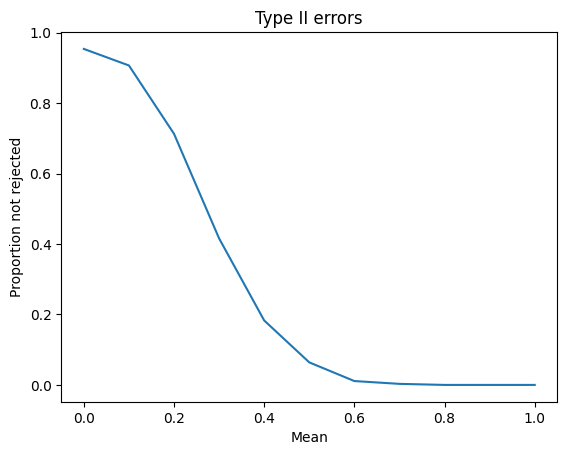

In [10]:
plt.plot(df['d'], df['proportion_not_rejected'])

plt.title('Type II errors')
plt.ylabel('Proportion not rejected')
plt.xlabel('Mean')
plt.show()